In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
import altair as alt
import numpy as np
import streamlit as st

In [25]:
df = pd.read_json("data/dashboard_cars.json", lines = True)
df = extra_features(df)
df = clean_df(df)
df.head()

,brand,model,version,gearbox,cartype,regdate,mileage,motorpower,fuel,car_steering,...,doors,financial,vidro elétrico,air bag,trava elétrica,ar condicionado,direção hidráulica,alarme,som,sensor de ré
0,ford,fiesta,fiesta sedan se 1.6 8v flex 4p,manual,passeio,2013,100,1.6,flex,hidráulica,...,4 portas,no_information,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1,ford,ka,ka 1.0 se se plus tivct flex 5p,manual,passeio,2015,58000,1.0,flex,elétrica,...,4 portas,ipva pago,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
2,ford,fiesta,fiesta 1.6 8v flex class 1.6 8v flex 5p,manual,hatch,2013,70000,1.6,flex,hidráulica,...,4 portas,ipva pago,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,ford,fiesta,fiesta sed. 1.6 8v flex 4p,no_information,sedã,2013,60719,1.6,flex,hidráulica,...,4 portas,ipva pago,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
4,ford,ka,ka 1.0i 3p,manual,no_information,2015,57000,1.0,flex,elétrica,...,4 portas,ipva pago,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brand               75 non-null     object 
 1   model               75 non-null     object 
 2   version             75 non-null     object 
 3   gearbox             75 non-null     object 
 4   cartype             75 non-null     object 
 5   regdate             75 non-null     int64  
 6   mileage             75 non-null     int64  
 7   motorpower          75 non-null     object 
 8   fuel                75 non-null     object 
 9   car_steering        75 non-null     object 
 10  carcolor            75 non-null     object 
 11  doors               75 non-null     object 
 12  financial           75 non-null     object 
 13  vidro elétrico      75 non-null     float64
 14  air bag             75 non-null     float64
 15  trava elétrica      75 non-null     float64
 16  ar condici

vidro elétrico        69
air bag               45
trava elétrica        67
ar condicionado       70
direção hidráulica    49
alarme                58
som                   43
sensor de ré          17
dtype: int64

In [27]:
cols = ['vidro elétrico', 'air bag', 'trava elétrica', 'ar condicionado',
       'direção hidráulica', 'alarme', 'som', 'sensor de ré']

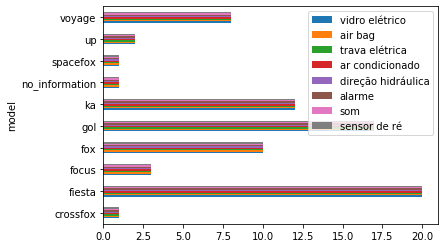

In [139]:
df_extra = df.groupby('model').count()[cols]
df_extra.plot(kind = 'barh')

In [ ]:
model_regdate_count(df)
financial_regdate(df)
model_power_count(df)

In [34]:
def model_regdate_count(df):
    chart = alt.Chart(df).mark_bar().encode(
    x = 'count()',
    y = alt.Y('model', sort = alt.Sort(encoding = 'x', order= 'descending')),
    tooltip = ['regdate','count()'],
    color = 'regdate:O'
    ).interactive()
    return chart


In [37]:
model_regdate_count(df)

alt.Chart(...)

In [35]:
def financial_regdate(df):   
    chart = alt.Chart(df).mark_bar().encode(
    x = 'count()',
    y = alt.Y('financial', sort = alt.Sort(encoding = 'x', order= 'descending')),
    tooltip = ['regdate','count()'],
    color = 'regdate:O'
    ).interactive()
    return chart
    

In [38]:
financial_regdate(df)

alt.Chart(...)

In [36]:
def model_power_count(df):
    chart = alt.Chart(df).mark_bar().encode(
    x = 'count()',
    y = alt.Y('model', sort = alt.Sort(encoding = 'x', order= 'descending')),
    tooltip = ['motorpower','count()'],
    color = 'motorpower:O'
    ).interactive()
    return chart

In [39]:
model_power_count(df)

alt.Chart(...)

In [60]:
cols

['vidro elétrico',
 'air bag',
 'trava elétrica',
 'ar condicionado',
 'direção hidráulica',
 'alarme',
 'som',
 'sensor de ré']

In [69]:
def extra_features(df):
    cols = ['vidro elétrico',
             'air bag',
             'trava elétrica',
             'ar condicionado',
             'direção hidráulica',
             'alarme',
             'som',
             'sensor de ré']
    df = df[cols]
    
    df.sum().astype(int).plot(kind ='barh')
    plt.title('Car Features')
    plt.xlabel('count')



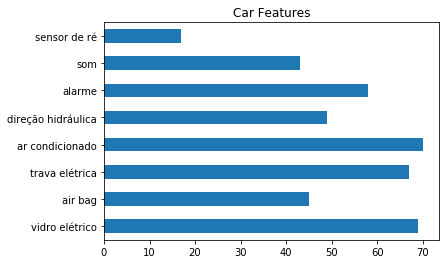

In [71]:
feat = extra_features(df)

In [74]:
df.head()

,brand,model,version,gearbox,cartype,regdate,mileage,motorpower,fuel,car_steering,...,doors,financial,vidro elétrico,air bag,trava elétrica,ar condicionado,direção hidráulica,alarme,som,sensor de ré
0,ford,fiesta,fiesta sedan se 1.6 8v flex 4p,manual,passeio,2013,100,1.6,flex,hidráulica,...,4 portas,no_information,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1,ford,ka,ka 1.0 se se plus tivct flex 5p,manual,passeio,2015,58000,1.0,flex,elétrica,...,4 portas,ipva pago,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
2,ford,fiesta,fiesta 1.6 8v flex class 1.6 8v flex 5p,manual,hatch,2013,70000,1.6,flex,hidráulica,...,4 portas,ipva pago,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,ford,fiesta,fiesta sed. 1.6 8v flex 4p,no_information,sedã,2013,60719,1.6,flex,hidráulica,...,4 portas,ipva pago,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
4,ford,ka,ka 1.0i 3p,manual,no_information,2015,57000,1.0,flex,elétrica,...,4 portas,ipva pago,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [81]:
df['mileage'].describe().T

count        75.000000
mean      64767.320000
std       25644.030828
min          47.000000
25%       59000.000000
50%       70000.000000
75%       82190.000000
max      103000.000000
Name: mileage, dtype: float64

In [76]:
df[cols].sum()

vidro elétrico        69.0
air bag               45.0
trava elétrica        67.0
ar condicionado       70.0
direção hidráulica    49.0
alarme                58.0
som                   43.0
sensor de ré          17.0
dtype: float64

In [80]:
df['model'].value_counts()

fiesta            20
gol               17
ka                12
fox               10
voyage             8
focus              3
up                 2
crossfox           1
spacefox           1
no_information     1
Name: model, dtype: int64

In [84]:
cols

['vidro elétrico',
 'air bag',
 'trava elétrica',
 'ar condicionado',
 'direção hidráulica',
 'alarme',
 'som',
 'sensor de ré']